In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from dython.nominal import associations
from folium import plugins
sns.set_style("ticks",{'axes.grid' : True})

In [2]:
police_data = pd.read_csv(r"C:\Users\Mariana\Downloads\ca_san_francisco_2020_04_01.csv")
police_data.head(5)

C:\Users\Mariana\AppData\Local\Temp\ipykernel_26860\3761332918.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  police_data = pd.read_csv(r"C:\Users\Mariana\Downloads\ca_san_francisco_2020_04_01.csv")


,raw_row_number,date,time,location,lat,lng,district,subject_age,subject_race,subject_sex,...,citation_issued,warning_issued,outcome,contraband_found,search_conducted,search_vehicle,search_basis,reason_for_stop,raw_search_vehicle_description,raw_result_of_contact_description
0,869921,2014-08-01,00:01:00,MASONIC AV & FELL ST,37.773004,-122.445873,NaN,NaN,asian/pacific islander,female,...,False,True,warning,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Warning
1,869922,2014-08-01,00:01:00,GEARY&10TH AV,37.780898,-122.468586,NaN,NaN,black,male,...,True,False,citation,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Citation
2,869923,2014-08-01,00:15:00,SUTTER N OCTAVIA ST,37.786919,-122.426718,NaN,NaN,hispanic,male,...,True,False,citation,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Citation
3,869924,2014-08-01,00:18:00,3RD ST & DAVIDSON,37.746380,-122.392005,NaN,NaN,hispanic,male,...,False,True,warning,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Warning
4,869925,2014-08-01,00:19:00,DIVISADERO ST. & BUSH ST.,37.786348,-122.440003,NaN,NaN,white,male,...,True,False,citation,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Citation


In [3]:
police_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905070 entries, 0 to 905069
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   raw_row_number                     905070 non-null  object 
 1   date                               905070 non-null  object 
 2   time                               905035 non-null  object 
 3   location                           905027 non-null  object 
 4   lat                                903373 non-null  float64
 5   lng                                903373 non-null  float64
 6   district                           852883 non-null  object 
 7   subject_age                        846182 non-null  float64
 8   subject_race                       905070 non-null  object 
 9   subject_sex                        905070 non-null  object 
 10  type                               905070 non-null  object 
 11  arrest_made                        9050

In [4]:
police_data.shape

(905070, 22)

In [5]:
police_data.columns.tolist()

['raw_row_number',
 'date',
 'time',
 'location',
 'lat',
 'lng',
 'district',
 'subject_age',
 'subject_race',
 'subject_sex',
 'type',
 'arrest_made',
 'citation_issued',
 'warning_issued',
 'outcome',
 'contraband_found',
 'search_conducted',
 'search_vehicle',
 'search_basis',
 'reason_for_stop',
 'raw_search_vehicle_description',
 'raw_result_of_contact_description']

In [6]:
police_data['subject_age'].describe()

count    846182.000000
mean         37.818577
std          13.632684
min          10.000000
25%          27.000000
50%          35.000000
75%          47.000000
max         100.000000
Name: subject_age, dtype: float64

In [7]:
police_data.describe(include='O')

,raw_row_number,date,time,location,district,subject_race,subject_sex,type,outcome,contraband_found,search_basis,reason_for_stop,raw_search_vehicle_description,raw_result_of_contact_description
count,905070,905070,905035,905027,852883,905070,905070,905070,889389,53381,53381,902858,905070,905070
unique,905070,3468,1440,313001,13,5,2,1,3,2,2,26,36,27
top,893009,2009-03-20,23:00:00,FILLMORE/OFARRELL,H,white,male,vehicular,citation,False,other,Moving Violation,No Search,Citation
freq,1,630,6002,1249,117520,372318,639219,905070,631602,45405,48676,563105,851482,631276


In [8]:
police_data.nunique()

raw_row_number                       905070
date                                   3468
time                                   1440
location                             313001
lat                                   62785
lng                                   52725
district                                 13
subject_age                              91
subject_race                              5
subject_sex                               2
type                                      1
arrest_made                               2
citation_issued                           2
warning_issued                            2
outcome                                   3
contraband_found                          2
search_conducted                          2
search_vehicle                            2
search_basis                              2
reason_for_stop                          26
raw_search_vehicle_description           36
raw_result_of_contact_description        27
dtype: int64

Missing values

In [9]:
police_data.isnull().sum()

raw_row_number                            0
date                                      0
time                                     35
location                                 43
lat                                    1697
lng                                    1697
district                              52187
subject_age                           58888
subject_race                              0
subject_sex                               0
type                                      0
arrest_made                               0
citation_issued                           0
warning_issued                            0
outcome                               15681
contraband_found                     851689
search_conducted                          0
search_vehicle                            0
search_basis                         851689
reason_for_stop                        2212
raw_search_vehicle_description            0
raw_result_of_contact_description         0
dtype: int64

Visualisation

In [10]:
police_data['subject_sex'].value_counts().reset_index()

,subject_sex,count
0,male,639219
1,female,265851


In [11]:
police_data['subject_age'].fillna(0,inplace=True)
police_data['subject_age'] = police_data['subject_age'].astype(int)
age_filtered = police_data[police_data['subject_age'] != 0]
age_count = age_filtered[['subject_age','subject_sex']].value_counts().reset_index()
age_count

C:\Users\Mariana\AppData\Local\Temp\ipykernel_26860\1332389589.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  police_data['subject_age'].fillna(0,inplace=True)


,subject_age,subject_sex,count
0,25,male,22933
1,30,male,21329
2,27,male,19073
3,28,male,19011
4,26,male,19007
...,...,...,...
174,12,female,2
175,98,female,2
176,95,male,2
177,11,male,1


Text(0, 0.5, 'Count')

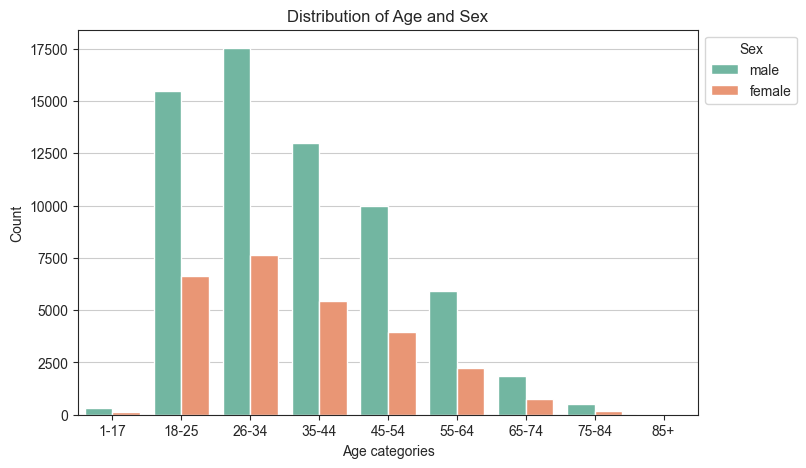

In [12]:
binInterval = [1, 17, 25, 34, 44, 54, 64, 74, 84, 120]
binLabels   = ["1-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65-74", "75-84", "85+"]
age_count['age_categories'] = pd.cut(age_count['subject_age'], bins = binInterval, labels=binLabels)
age_count['age_categories'].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(age_count, x= 'age_categories', y='count', hue='subject_sex', native_scale=True, palette="Set2", errorbar=None)

plt.legend(title="Sex", loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Distribution of Age and Sex')
plt.xlabel('Age categories')
plt.ylabel('Count')

C:\Users\Mariana\AppData\Local\Temp\ipykernel_26860\806129423.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='subject_sex', y='subject_age', data=police_data_cleaned, palette='Set2')


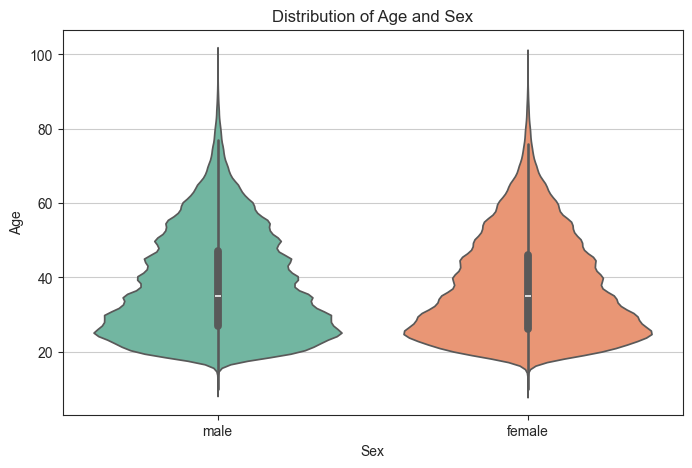

In [13]:
police_data_cleaned = police_data.dropna(subset=['subject_age', 'subject_sex'])
police_data_cleaned = police_data_cleaned[police_data_cleaned['subject_age'] != 0]

plt.figure(figsize=(8,5))
sns.violinplot(x='subject_sex', y='subject_age', data=police_data_cleaned, palette='Set2')

plt.xlabel('Sex')
plt.ylabel('Age')
plt.title('Distribution of Age and Sex')
plt.show()

C:\Users\Mariana\AppData\Local\Temp\ipykernel_26860\3610255653.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='subject_sex', y='subject_age', data=police_data_cleaned, palette='Set2')


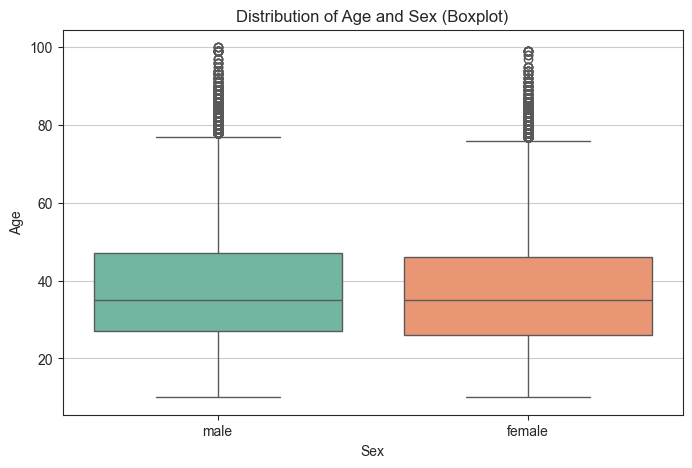

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(x='subject_sex', y='subject_age', data=police_data_cleaned, palette='Set2')

plt.xlabel('Sex')
plt.ylabel('Age')
plt.title('Distribution of Age and Sex (Boxplot)')
plt.show()

In [15]:
police_data['subject_race'].value_counts().reset_index()

,subject_race,count
0,white,372318
1,asian/pacific islander,157684
2,black,152196
3,hispanic,116014
4,other,106858


Text(0, 0.5, 'Count')

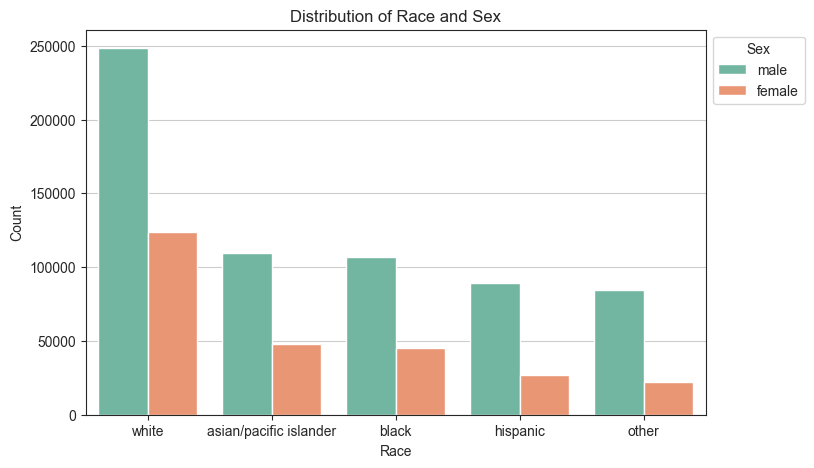

In [16]:
race_to_age = police_data[['subject_race', 'subject_sex']].value_counts().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(race_to_age, x= 'subject_race', y='count', hue='subject_sex', native_scale=True, palette="Set2", errorbar=None)
plt.legend(title="Sex", loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Distribution of Race and Sex')
plt.xlabel('Race')
plt.ylabel('Count')

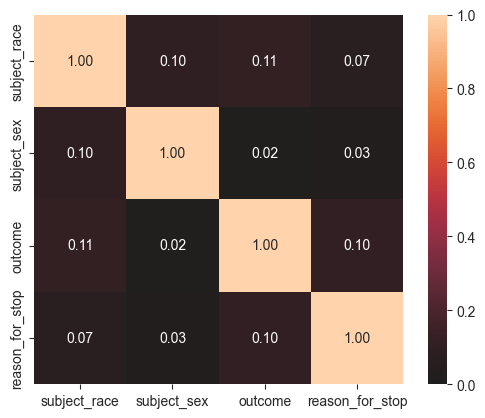

In [17]:
police_data_cleaned = police_data.dropna(subset=['subject_race', 'subject_sex', 'outcome', 'reason_for_stop'])

categorical_columns = ['subject_race', 'subject_sex', 'outcome', 'reason_for_stop']

cramer_v = associations(police_data_cleaned[categorical_columns], nominal_columns='all')['corr']


C:\Users\Mariana\AppData\Local\Temp\ipykernel_26860\580360335.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crime_counts.index, y=crime_counts.values, palette="Set2")


Text(0, 0.5, 'Number of Crimes')

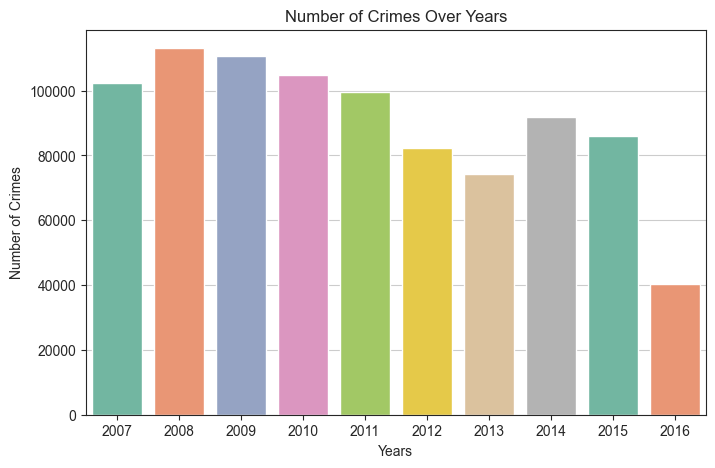

In [18]:
police_data['date'] = pd.to_datetime(police_data['date'])
police_data['year'] = police_data['date'].dt.year

crime_counts = police_data['year'].value_counts().sort_index()

plt.figure(figsize=(8,5))
sns.barplot(x=crime_counts.index, y=crime_counts.values, palette="Set2")
plt.title('Number of Crimes Over Years')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')


Text(0, 0.5, 'Number of Crimes')

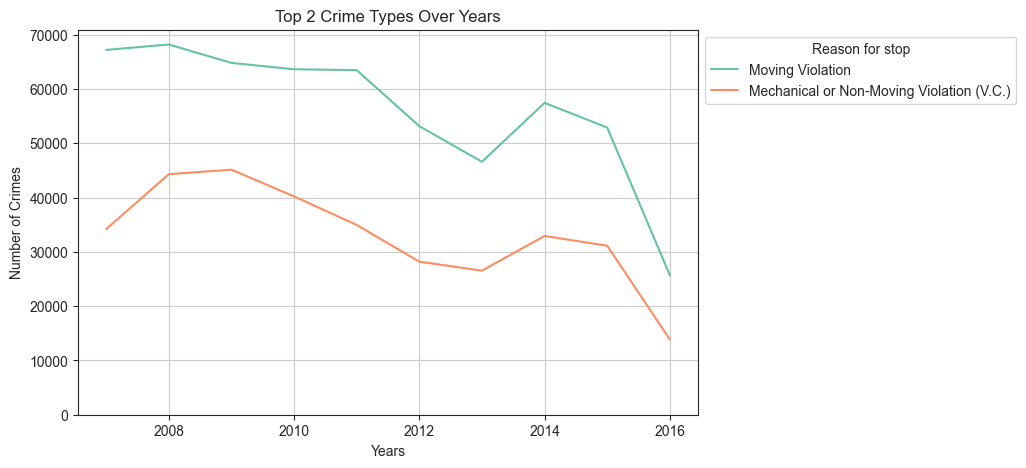

In [19]:
crime_years = police_data[['year','reason_for_stop']].value_counts().reset_index().sort_values(['count'], ascending=False).head(20)


plt.figure(figsize=(8,5))
sns.lineplot(crime_years, x= 'year', y='count', hue='reason_for_stop', palette="Set2")
plt.legend(title="Reason for stop", loc='upper left', bbox_to_anchor=(1, 1))
plt.ylim(0)
plt.title('Top 2 Crime Types Over Years')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')


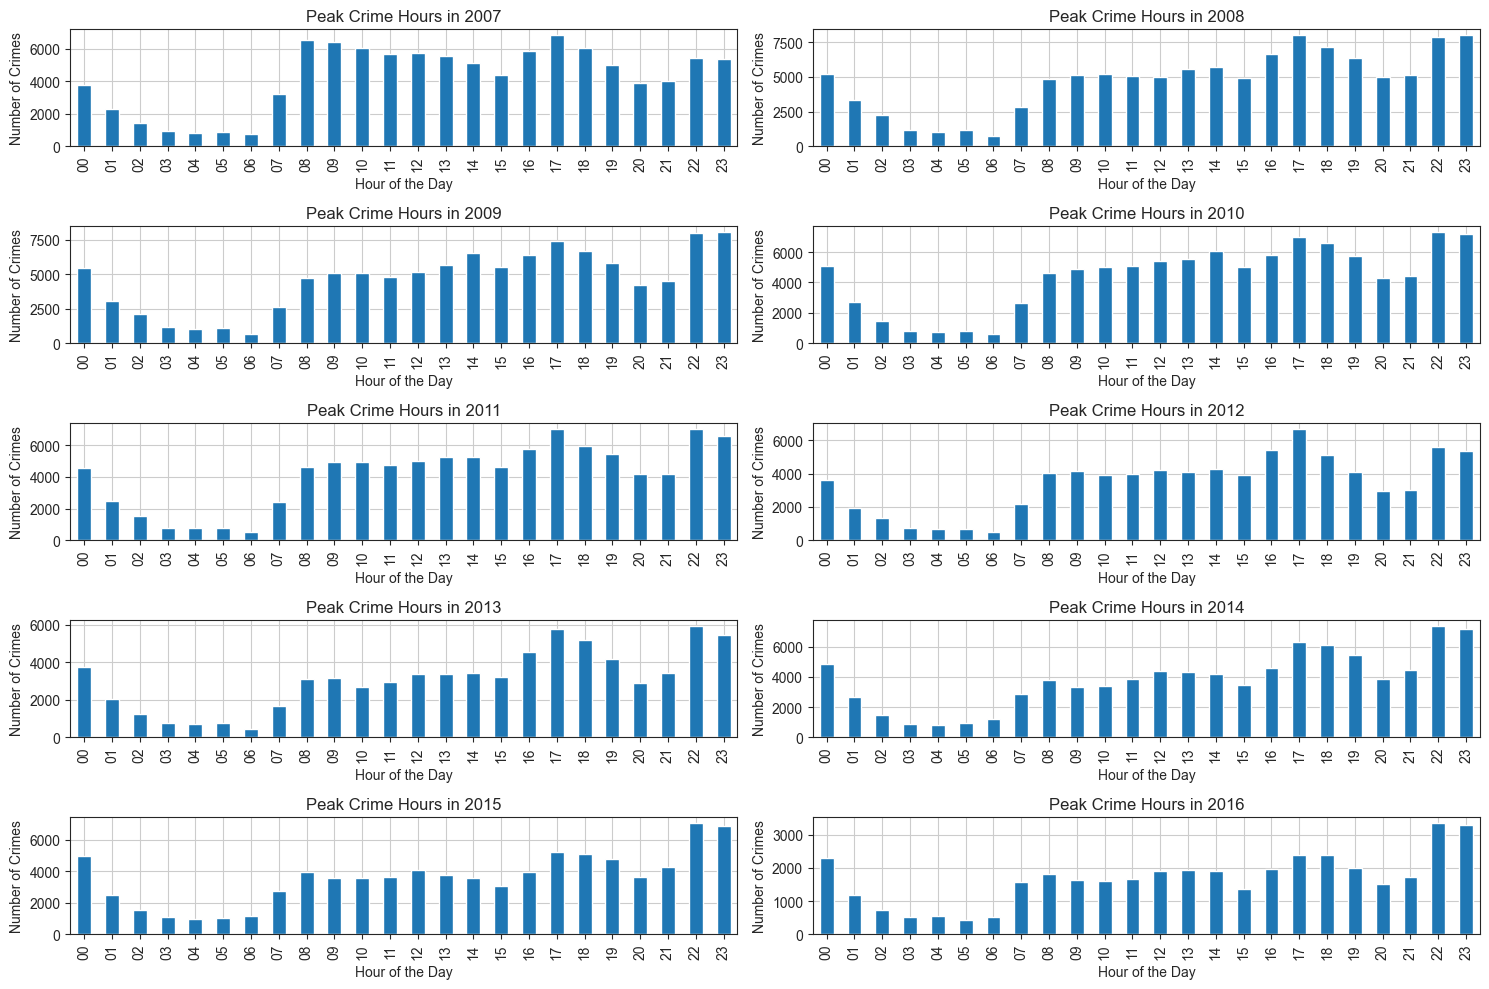

In [20]:
police_data['hour'] = police_data['time'].dropna().astype(str).str[0:2]

unique_years = sorted(police_data['year'].unique())

fig, axs = plt.subplots(len(unique_years) // 2, 2, figsize=(15, 10))

for i, year in enumerate(unique_years):
    row = i // 2
    col = i % 2
    subset = police_data[police_data['year'] == year]
    crime_hours = subset['hour']
    crime_hours.value_counts().sort_index().plot(kind='bar', ax=axs[row, col])
    axs[row, col].set_title(f'Peak Crime Hours in {year}')
    axs[row, col].set_xlabel('Hour of the Day')
    axs[row, col].set_ylabel('Number of Crimes')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Number of Crimes')

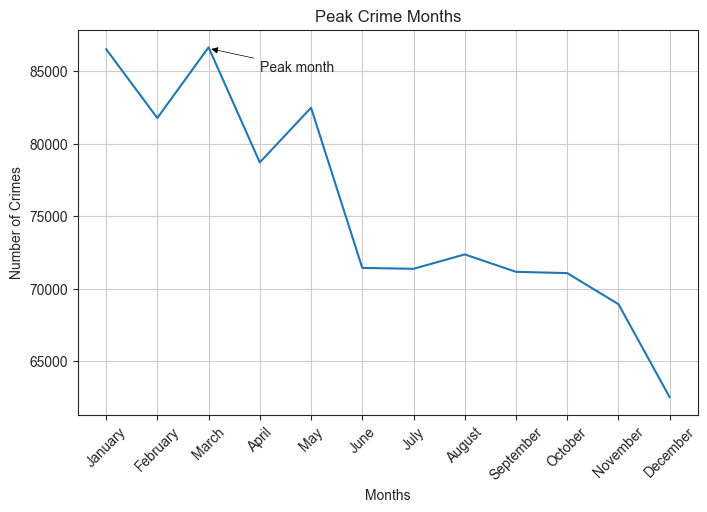

In [21]:
police_data['month'] = police_data['date'].astype(str).str[5:7]
crime_months = police_data['month'].value_counts().reset_index().sort_values('month', ascending=True)
crime_months.replace(['01','02','03','04','05','06','07','08','09','10','11','12'], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], inplace=True)

plt.figure(figsize=(8,5))
sns.lineplot(crime_months, x= 'month', y='count')
plt.annotate('Peak month', ('March', 86590), xytext=('April', 85000), arrowprops=dict(arrowstyle= '-|>',color='black', lw=0.5))
plt.title('Peak Crime Months')
plt.xlabel('Months')
plt.tick_params(axis='x', labelrotation=45)
plt.ylabel('Number of Crimes')

Text(0, 0.5, 'Number of Crimes')

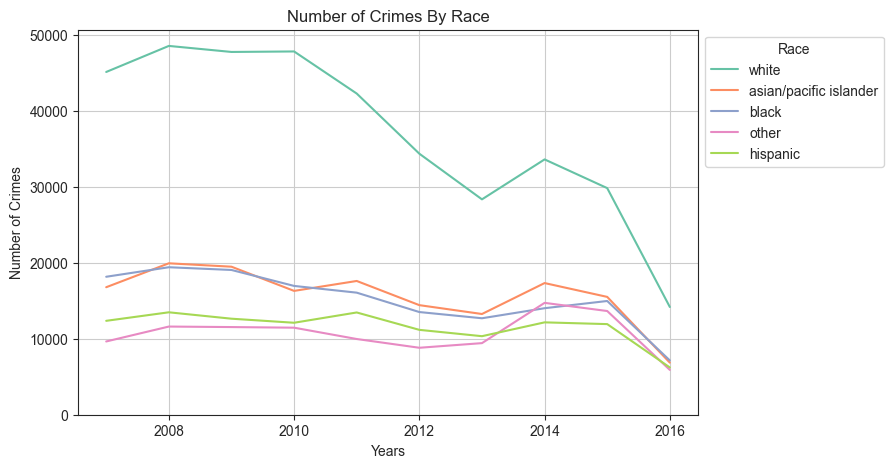

In [22]:
race_to_age = police_data[['year', 'subject_race']].value_counts().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(race_to_age, x= 'year', y='count', hue='subject_race', palette="Set2")
plt.legend(title="Race", loc='upper left', bbox_to_anchor=(1, 1))
plt.ylim(0)
plt.title('Number of Crimes By Race')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')


In [24]:
districts = police_data['district'].value_counts().reset_index()
districts

,district,count
0,H,117520
1,I,108213
2,B,105867
3,C,95406
4,D,87702
5,G,85276
6,E,73846
7,A,69677
8,F,61713
9,J,46171
